In [1]:
#%% Imports
import os
import numpy as np
import spectral
import matplotlib.pyplot as plt
from skimage import exposure, io
import json
import glob

In [2]:
#%% Optional graphics settings for interactive plotting
#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'qt')

In [3]:
#%% Paths
base_data_dir = '/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825'
#base_data_dir = '/mnt/datadisk/Massimal/Tmp'
refspec_dir = os.path.join(base_data_dir,'_RefSpectra_Rad')
print(refspec_dir)

/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad


In [4]:
#%% Constants / input parameters
rbg_default = (640, 550, 460)   # Default wavelengths for RGB display

In [24]:
#%% Find all files with spectra
search_path = refspec_dir + '/*.hdr'

files = glob.glob(search_path)
files.sort()
nFiles = len(files)
for file in files:
    print(file)

/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaN1_BlackRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaN1_GrayRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaN2_BlackRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaN2_GrayRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaS_BlackRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergAreaS_GrayRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergTransects2-TS3_BlackRef.spec.hdr
/media/mha114/MassimalDataProcessing/Larvik_Olberg/Hyperspectral/20210825/_RefSpectra_Rad/OlbergTransects2-TS3_GrayRef.spec.hdr


In [6]:
#%% Open example spectrum
spec_handle = spectral.io.envi.open(files[0]) 

In [7]:
spec_handle.metadata

{'interleave': 'bip',
 'lines': '1',
 'samples': '1',
 'bands': '300',
 'data type': '4',
 'wavelength': ['390.86',
  '392.87',
  '394.88',
  '396.89',
  '398.9',
  '400.91',
  '402.92',
  '404.93',
  '406.94',
  '408.96',
  '410.97',
  '412.99',
  '415.0',
  '417.02',
  '419.04',
  '421.06',
  '423.08',
  '425.1',
  '427.12',
  '429.14',
  '431.17',
  '433.19',
  '435.22',
  '437.24',
  '439.27',
  '441.3',
  '443.33',
  '445.36',
  '447.39',
  '449.42',
  '451.45',
  '453.49',
  '455.52',
  '457.56',
  '459.59',
  '461.63',
  '463.67',
  '465.71',
  '467.75',
  '469.79',
  '471.83',
  '473.87',
  '475.91',
  '477.96',
  '480.0',
  '482.05',
  '484.1',
  '486.14',
  '488.19',
  '490.24',
  '492.29',
  '494.34',
  '496.39',
  '498.45',
  '500.5',
  '502.56',
  '504.61',
  '506.67',
  '508.73',
  '510.79',
  '512.84',
  '514.9',
  '516.97',
  '519.03',
  '521.09',
  '523.15',
  '525.22',
  '527.29',
  '529.35',
  '531.42',
  '533.49',
  '535.56',
  '537.63',
  '539.7',
  '541.77',
  '54

In [19]:
#%% Convert relevant metadata
# Read wavelengths
wl = np.array([float(i) for i in spec_handle.metadata['wavelength']])
nSamp = wl.size

In [35]:
#%% Read all spectra
spec_mat = np.zeros((nSamp,nFiles))
labels = []
for ii,file in enumerate(files):
    spec_handle = spectral.io.envi.open(file)
    labels.append(spec_handle.metadata['label'])
    spec_mat[:,ii] = np.array(spec_handle.load()).flatten()

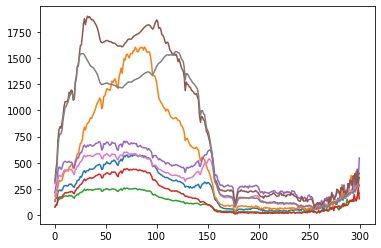

In [38]:
plt.plot(spec_mat)